# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [1]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [2]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
    print ()   
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        positions[0] = self.pos
        # YOUR CODE HERE
        for i in range(1,n+1):
            positions[i] = positions[i-1] +self.pickStep()
            self.pos = positions[i]
           
        
        
        return positions


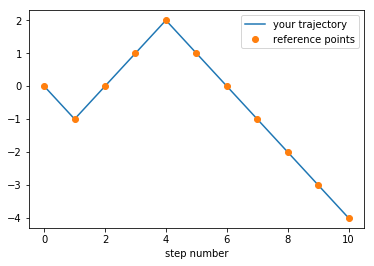

In [3]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

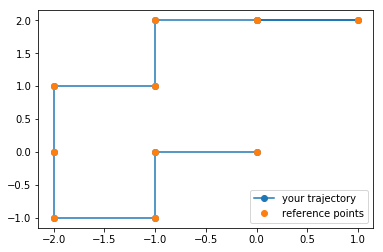

In [4]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

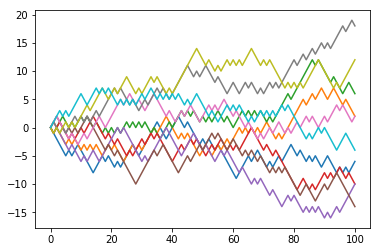

In [5]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


100


Text(0.5,1,'Plot of average position and average position squared for 100 1D walkers over 1000 steps')

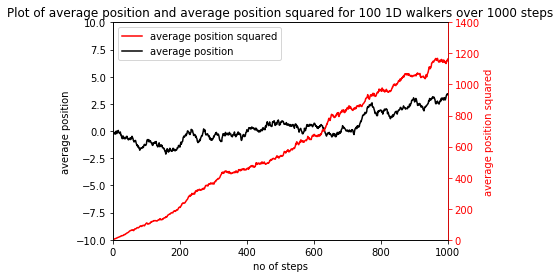

In [9]:
import matplotlib.lines as mlines
nsteps = 1000
ndim = 1
nwalkers = 100
walker_positions =[]
average_positions = []
result_sqrd = []
result =[]
for i in range(0,nwalkers):
    w = walker(numpy.zeros(1), ndim=1)
    t = w.doSteps(nsteps)
    walker_positions.append(t)
print(len(walker_positions))
for s in range(0,nsteps+1):
        position_at_step = []
        for j in range(0, nwalkers):
            position_at_step.append(walker_positions[j][s])
        pos_sqrd = numpy.array(position_at_step)**2
        result.append(numpy.average(position_at_step))
        result_sqrd.append(numpy.average(pos_sqrd))


fig, ax1 = plt.subplots()
xs = numpy.arange(0,1001, 1)
ax1.plot(xs, result, color = 'black')

ax1.set_xlabel('no of steps')
ax1.set_ylabel('average position')

ax2=ax1.twinx()
ax2.plot(xs, result_sqrd, color = 'red')
ax2.set_ylabel('average position squared', color = 'red')
ax2.spines['right'].set_color('red')
ax2.tick_params(color = 'red')
ax2.yaxis.label.set_color('red')
ax1.set_ylim(-10, 10)
ax2.set_ylim(0,1400)
ax1.set_xlim(0,1000)
ax2.set_yticks(numpy.arange(0,1600, 200))
ax2.set_yticklabels(numpy.arange(0,1600, 200), color = 'red')

red_line = mlines.Line2D([], [], linestyle = '-', color ='red' , label = 'average position squared')
black_line = mlines.Line2D([], [], linestyle = '-', color ='black' , label = 'average position')


plt.legend(handles =[ red_line, black_line] )
plt.title('Plot of average position and average position squared for 100 1D walkers over 1000 steps')


**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


Text(0.5,1,'Plot of average squared distance moved by 400 walkers with respect to an origin (0,0) over 100 steps')

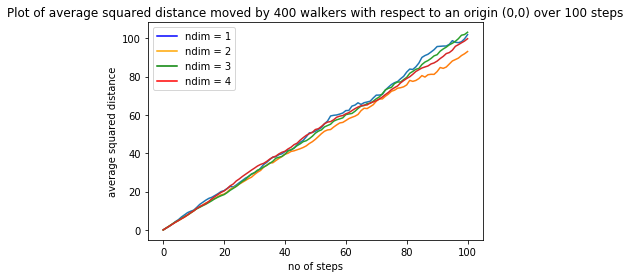

In [10]:
import matplotlib.lines as mlines
nsteps = 100
nwalkers = 400
dimensions = range(1,5)


for n in dimensions:


    walker_positions =[]
    average_positions = []
    result_sqrd = []
    result =[]
   
    for i in range(0,nwalkers):
        distances = []
        w = walker(numpy.zeros(1), ndim=n)
        t = w.doSteps(nsteps)
        
        for j in t:
            
            d = numpy.linalg.norm(j)
            distances.append(d)
           
        walker_positions.append(distances)
    
   
    for s in range(0,nsteps+1):
            position_at_step = []
            for j in range(0, nwalkers):
                position_at_step.append(walker_positions[j][s])
            pos_sqrd = numpy.array(position_at_step)**2
            result.append(numpy.average(position_at_step))
            result_sqrd.append(numpy.average(pos_sqrd))
    xs = numpy.arange(0,101, 1)
    plt.plot(xs, result_sqrd)
plt.xlabel('no of steps')
blue_line = mlines.Line2D([], [], linestyle = '-', color ='blue' , label = 'ndim = 1')
orange_line = mlines.Line2D([], [], linestyle = '-', color ='orange' , label = 'ndim = 2')
green_line = mlines.Line2D([], [], linestyle = '-', color ='green' , label = 'ndim = 3')
red_line = mlines.Line2D([], [], linestyle = '-', color ='red' , label = 'ndim = 4')


plt.legend(handles =[blue_line, orange_line, green_line, red_line] )
plt.ylabel('average squared distance')
plt.title('Plot of average squared distance moved by 400 walkers with respect to an origin (0,0) over 100 steps')


## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


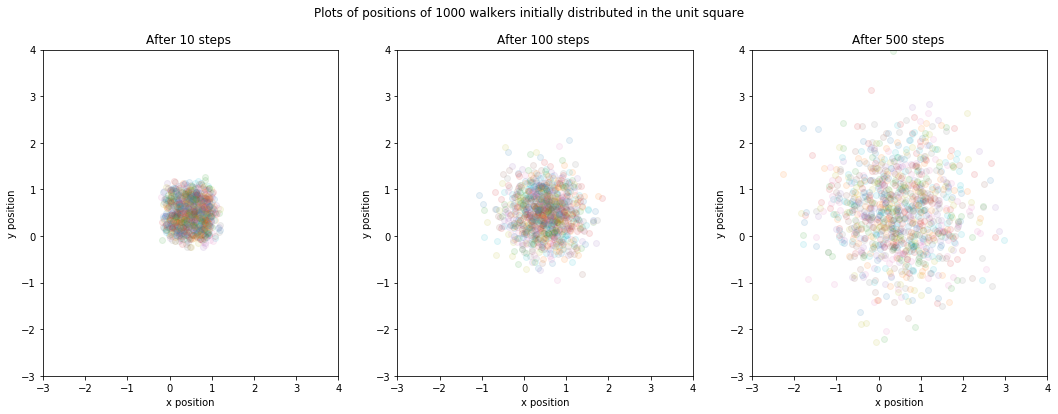

In [11]:
ndim=2
nwalkers=1000 #??
nsteps = 500


rand_pos = numpy.random.uniform(size=(nwalkers, ndim))
walker_positions = []
for i in range(0, nwalkers):
    w = walker(rand_pos[i], ndim=ndim, step_size = 0.05)
    t = w.doSteps(nsteps)
    walker_positions.append(t)

# this code is a template to create 3 subplots in one, adapt it to your task!
fig = plt.figure(figsize=(18,6))

fig.suptitle('Plots of positions of 1000 2D walkers initially distributed in the unit square')
for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("After {} steps ".format(nsteps))
    plt.xlabel('x position')
    plt.ylabel('y position')
    for k in range(0, nwalkers):
        plt.scatter(walker_positions[k][nsteps][0], walker_positions[k][nsteps][1], alpha=0.1)
